In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import seaborn as sns
import math

file1 = pd.read_csv('file1.csv', ',')

file1.describe()

,latitude,longitude,altitude,speedmph,speedkmh,accuracy
count,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000
mean,41.663934,-87.307773,192.319649,39.329404,63.294246,10.458831
std,0.083421,0.254616,19.384816,18.335309,29.507759,6.429008
min,41.592181,-87.638856,171.000000,0.000000,0.000000,5.000000
25%,41.604792,-87.530962,182.000000,28.000000,45.000000,10.000000
50%,41.616590,-87.323511,185.000000,40.500000,65.200000,10.000000
75%,41.710130,-87.133026,191.000000,48.175000,77.475000,10.000000
max,41.877575,-86.754688,266.000000,100.500000,161.700000,98.216204


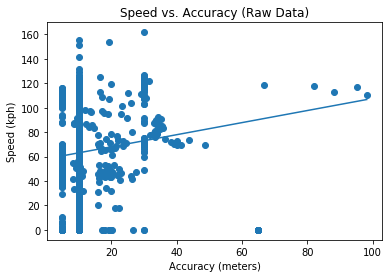

In [2]:
plt.scatter(file1['accuracy'],file1['speedkmh'])
plt.xlabel('Accuracy (meters)')
plt.ylabel('Speed (kph)')
plt.title('Speed vs. Accuracy (Raw Data)')

plt.plot(np.unique(file1['accuracy']), \
         np.poly1d(np.polyfit(file1['accuracy'], file1['speedkmh'], 1))\
         (np.unique(file1['accuracy'])))
#There is a positive correlation between speed and accuracy.

Text(0.5, 0, 'Speed (kph)')

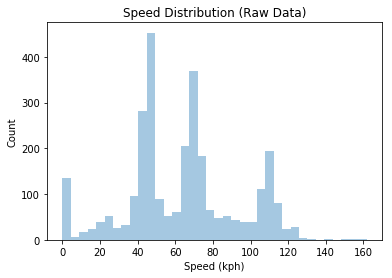

In [3]:
sns.distplot(file1['speedkmh'], kde = False)
plt.title('Speed Distribution (Raw Data)')
plt.ylabel('Count')
plt.xlabel('Speed (kph)')

In [4]:
mean_speedkmh = file1['speedkmh'].mean()
#The average speed for this dataset is 63.29 kph.

std_speedkmh = file1['speedkmh'].std()
#29.5 kph
upperbound_2sig = mean_speedkmh + 2 * std_speedkmh
#122.3 kph ~ 76 mph
upperbound_3sig = mean_speedkmh + 3 * std_speedkmh
#151.8 kph ~ 94 mph

Text(0, 0.5, 'Count')

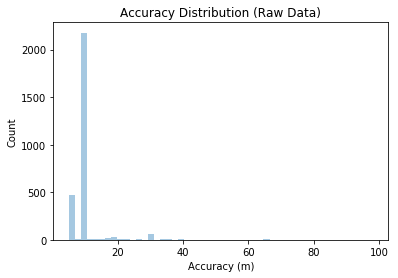

In [5]:
sns.distplot(file1['accuracy'], kde = False)
plt.title('Accuracy Distribution (Raw Data)')
plt.xlabel('Accuracy (m)')
plt.ylabel('Count')

In [6]:
file1_clean = file1.loc[(file1['speedkmh'] < upperbound_2sig) & \
                        (file1['accuracy'] <= 10)]

file1_clean.describe()

,latitude,longitude,altitude,speedmph,speedkmh,accuracy
count,2636.000000,2636.000000,2636.000000,2636.000000,2636.000000,2636.000000
mean,41.664784,-87.311951,191.518589,38.671206,62.234901,9.111570
std,0.083410,0.251610,17.510421,17.665368,28.429410,1.907298
min,41.592379,-87.638186,171.000000,0.000000,0.000000,5.000000
25%,41.604793,-87.532001,182.000000,27.800000,44.800000,10.000000
50%,41.615946,-87.321402,185.000000,39.600000,63.800000,10.000000
75%,41.711085,-87.133602,191.000000,46.500000,74.825000,10.000000
max,41.872075,-86.755283,266.000000,75.900000,122.200000,10.000000


Text(0, 0.5, 'Count')

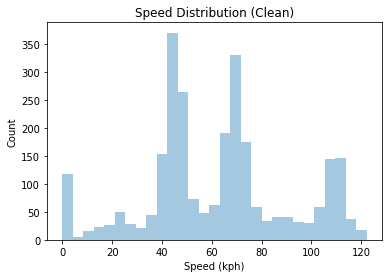

In [7]:
sns.distplot(file1_clean['speedkmh'], kde = False)
plt.title('Speed Distribution (Clean)')
plt.xlabel('Speed (kph)')
plt.ylabel('Count')

Text(0, 0.5, 'Speed (kph)')

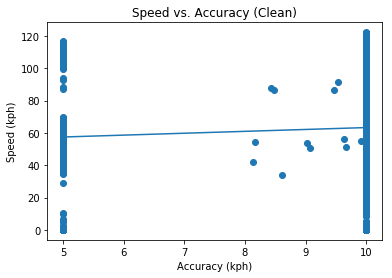

In [8]:
plt.scatter(file1_clean['accuracy'],file1_clean['speedkmh'])

plt.plot(np.unique(file1_clean['accuracy']), \
         np.poly1d(np.polyfit(file1_clean['accuracy'], file1_clean['speedkmh'], 1))\
         (np.unique(file1_clean['accuracy'])))

plt.title('Speed vs. Accuracy (Clean)')
plt.xlabel('Accuracy (kph)')
plt.ylabel('Speed (kph)')


In [9]:
file1_clean_acc10 = file1_clean.loc[(file1['accuracy'] == 10.0)]
file1_clean_acc5 = file1_clean.loc[(file1['accuracy'] == 5.0)]

file1_clean_acc10.describe()

,latitude,longitude,altitude,speedmph,speedkmh,accuracy
count,2158.000000,2158.000000,2158.000000,2158.000000,2158.000000,2158.0
mean,41.670579,-87.325248,192.425394,39.314875,63.270853,10.0
std,0.086122,0.262013,18.660218,17.590692,28.308972,0.0
min,41.592379,-87.638186,171.000000,0.000000,0.000000,10.0
25%,41.604729,-87.541173,182.000000,27.800000,44.700000,10.0
50%,41.619467,-87.378917,185.000000,41.350000,66.550000,10.0
75%,41.718204,-87.083926,192.000000,47.500000,76.475000,10.0
max,41.872075,-86.755283,266.000000,75.900000,122.200000,10.0


In [10]:
file1_clean_acc5.describe()

,latitude,longitude,altitude,speedmph,speedkmh,accuracy
count,466.000000,466.000000,466.000000,466.000000,466.000000,466.0
mean,41.638673,-87.253372,186.856223,35.687339,57.431760,5.0
std,0.063612,0.181564,7.725863,17.845956,28.721005,0.0
min,41.596420,-87.635442,177.000000,0.000000,0.000000,5.0
25%,41.607517,-87.256538,183.000000,28.000000,45.000000,5.0
50%,41.613882,-87.220090,185.000000,29.200000,47.000000,5.0
75%,41.620652,-87.178734,188.000000,41.700000,67.075000,5.0
max,41.799261,-86.759924,258.000000,72.400000,116.500000,5.0


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


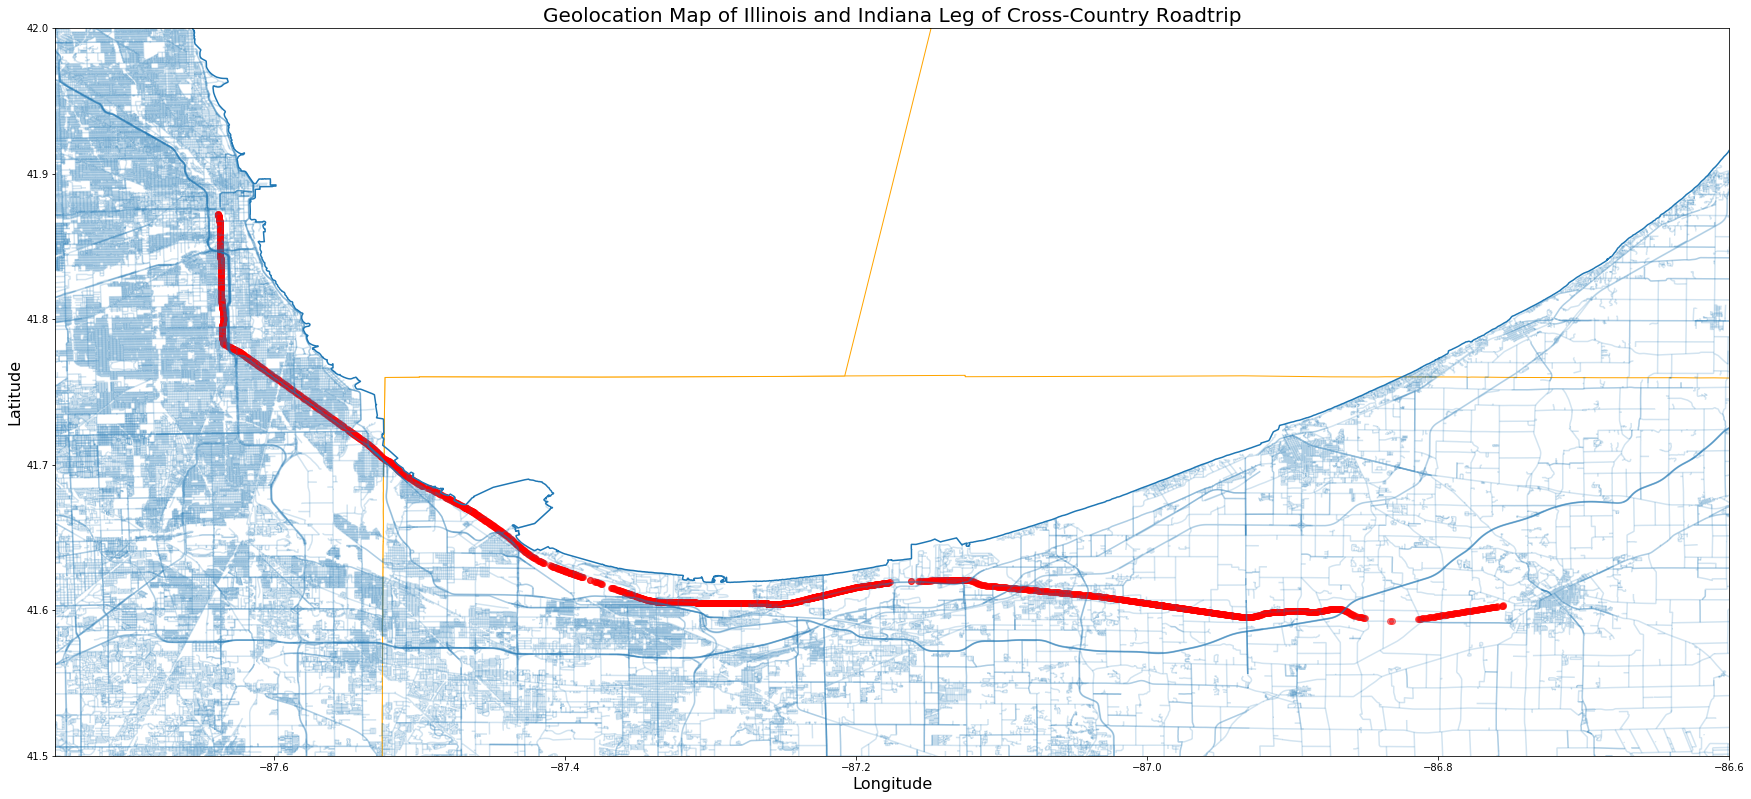

In [12]:
file1_clean['Coordinates'] = list(zip(file1_clean.longitude, file1_clean.latitude))

file1_clean['Coordinates'] = file1_clean['Coordinates'].apply(Point)

geofile1 = gpd.GeoDataFrame(file1_clean, geometry='Coordinates')

usa = gpd.read_file('tl_2018_us_state/tl_2018_us_state.shp')
coastline = gpd.read_file('tl_2018_us_coastline/tl_2018_us_coastline.shp')
laporte_in = gpd.read_file('tl_2018_18091_roads/tl_2018_18091_roads.shp')
lake_in = gpd.read_file('tl_2018_18089_roads/tl_2018_18089_roads.shp')
porter_in = gpd.read_file('tl_2018_18127_roads/tl_2018_18127_roads.shp')
cook_il = gpd.read_file('tl_2018_17031_roads/tl_2018_17031_roads.shp')
berrian_mi = gpd.read_file('tl_2018_26021_roads/tl_2018_26021_roads.shp')

#https://www.census.gov/cgi-bin/geo/shapefiles/index.php?

fig, ax = plt.subplots(figsize = (30,30))
ax.set_xlim([-87.75, -86.6])
ax.set_ylim([41.5, 42.0])

usa[usa.NAME == 'Indiana'].plot(ax = ax, color='white', edgecolor='orange')
usa[usa.NAME == 'Illinois'].plot(ax = ax, color='white', edgecolor='orange')
laporte_in.plot(ax = ax, alpha = 0.2)
lake_in.plot(ax = ax, alpha = 0.2)
porter_in.plot(ax = ax, alpha = 0.2)
cook_il.plot(ax = ax, alpha = 0.2)
berrian_mi.plot(ax = ax, alpha = 0.2)
coastline.plot(ax = ax)

#Chicago, IL to La Porte, IN

geofile1.plot(ax=ax, color='red', alpha = 0.5)

plt.title('Geolocation Map of Illinois and Indiana Leg of Cross-Country Roadtrip', fontsize=20)
plt.xlabel('Longitude', fontsize=16)
plt.ylabel('Latitude', fontsize=16)
plt.show()

In [13]:
#https://www.thoughtco.com/degree-of-latitude-and-longitude-distance-4070616
#Latitude: 1 deg = 111 km
#Longitude: 1 deg = 85 km

start = (-86.75528299999999, 41.603271)
end = (-87.638186, 41.872075)

delta_long = start[0] - end[0]
delta_lat = start[1] - end[1]

delta_km_ew = delta_long * 85
delta_km_ns = delta_lat * 111

distance = (delta_km_ew**2 + delta_km_ns**2)**0.5

print(distance)

80.76061271155481


In [14]:
total_distance = 0
for x in range(2635):
    start = (file1_clean.iloc[x,2], file1_clean.iloc[x,1])
    end = (file1_clean.iloc[x+1,2], file1_clean.iloc[x+1,1])
    
    delta_long = start[0] - end[0]
    delta_lat = start[1] - end[1]

    delta_km_ew = delta_long * 85
    delta_km_ns = delta_lat * 111

    distance = (delta_km_ew**2 + delta_km_ns**2)**0.5
    
    total_distance = total_distance + distance
print(total_distance)

92.86839700056666
